In [1]:
from Functions.fn_basic import *
from Functions.fn_stats import *
from Functions.fn_plots import *

import os, mne
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statannotations.Annotator import Annotator
import statannotations

In [9]:
#exp_folder = input('Experiment folder (e.g., Eyes Open\Baseline):')
exp_folder_1 = r"Eyes Closed\Baseline"
exp_folder_2 = r"Eyes Closed\6 weeks"
exp_folder_3 = r"Eyes Closed\10 weeks"
# TO-DO! Get the final folder name to a variable to use for plotting

psd_reg_folder = r"Results\PSD\regions"
psd_ch_folder = r"Results\PSD\channels"

condition_code_list = [['EC_00','EC_06'],['EC_06','EC_07'],['EC_00','EC_07']]

[dir_inprogress_reg_1,b_names_reg_1,condition_reg_1] = readPSDFiles(exp_folder_1,psd_reg_folder)
[dir_inprogress_reg_2,b_names_reg_2,condition_reg_2] = readPSDFiles(exp_folder_2,psd_reg_folder)
[dir_inprogress_reg_3,b_names_reg_3,condition_reg_3] = readPSDFiles(exp_folder_3,psd_reg_folder)

dir_inprogress_reg = dir_inprogress_reg_1,dir_inprogress_reg_2,dir_inprogress_reg_3
b_names_reg = b_names_reg_1,b_names_reg_2,b_names_reg_3
condition_reg = condition_reg_1,condition_reg_2,condition_reg_3

[dir_inprogress_ch_1,b_names_ch_1,condition_ch_1] = readPSDFiles(exp_folder_1,psd_ch_folder)
[dir_inprogress_ch_2,b_names_ch_2,condition_ch_2] = readPSDFiles(exp_folder_2,psd_ch_folder)
[dir_inprogress_ch_3,b_names_ch_3,condition_ch_3] = readPSDFiles(exp_folder_3,psd_ch_folder)

dir_inprogress_ch = dir_inprogress_ch_1,dir_inprogress_ch_2,dir_inprogress_ch_3
b_names_ch = b_names_ch_1,b_names_ch_2,b_names_ch_3
condition_ch = condition_ch_1,condition_ch_2,condition_ch_3

clean_folder = r"Data\Clean"
dir_inprogress_epo = os.path.join(clean_folder,exp_folder_1)
_, subject_names = readFiles(dir_inprogress_epo,"_clean-epo.fif")
epochs = mne.read_epochs(fname='{}\{}_clean-epo.fif'.format(dir_inprogress_epo,subject_names[0]))

Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 26
Reading c:\Users\TANIJARV\Downloads\Ketamine-SI project\eeg-pipeline\Data\Clean\Eyes Closed\Baseline\OKTOS_0001_00A_EC_clean-epo.fif ...
    Read a total of 1 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    4999.02 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
52 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [16]:
df_psd_reg = pd.DataFrame()
for i in range(len(b_names_reg[0])):
    for n_exps in range(len(b_names_reg)):
        globals()[b_names_reg[n_exps][i]] = pd.read_excel('{}\{}.xlsx'\
                                            .format(dir_inprogress_reg[n_exps],b_names_reg[n_exps][i]))\
            .assign(**{'Frequency band': condition_reg[n_exps][i][1],'Condition': condition_reg[n_exps][i][0]})
        df_psd_reg = pd.concat([df_psd_reg,globals()[b_names_reg[n_exps][i]]])

for condition in condition_code_list:
    df_reg_pvals,significant_reg = paired_Ttest(df_psd_reg,condition)
    try:
        os.makedirs(os.path.join(psd_reg_folder,''))
    except FileExistsError:
        pass
    df_reg_pvals.to_excel(r"Results\PSD\regions\p-values_{}-{}.xlsx".format(condition[0],condition[1]))

Significant changes of Low-Beta are:
Frontal with p-value of 0.04331348561142242
Significant changes of Alpha are:
Temporal with p-value of 0.0058859490618399105
Centro-parietal with p-value of 0.01503266968249168
Significant changes of Delta are:
Temporal with p-value of 0.0315096247461015
Significant changes of Low-Beta are:
Centro-parietal with p-value of 0.044695174307290315
Occipital with p-value of 0.03162659104134695
Significant changes of Theta are:
Temporal with p-value of 0.020626482570808506


In [15]:

df_psd_ch = pd.DataFrame()
for i in range(len(b_names_ch[0])):
    for n_exps in range(len(b_names_ch)):
        globals()[b_names_ch[n_exps][i]] = pd.read_excel('{}\{}.xlsx'\
                                            .format(dir_inprogress_ch[n_exps],b_names_ch[n_exps][i]))\
            .assign(**{'Frequency band': condition_ch[n_exps][i][1],'Condition': condition_ch[n_exps][i][0]})
        df_psd_ch = pd.concat([df_psd_ch,globals()[b_names_ch[n_exps][i]]])

for condition in condition_code_list:
    df_ch_pvals,significant_ch = paired_Ttest(df_psd_ch,condition)
    try:
        os.makedirs(os.path.join(psd_ch_folder,''))
    except FileExistsError:
        pass
    df_ch_pvals.to_excel(r"Results\PSD\channels\p-values_{}-{}.xlsx".format(condition[0],condition[1]))

Significant changes of Alpha are:
Pz with p-value of 0.02301858037415522
Significant changes of Delta are:
P8 with p-value of 0.049050631029278036
T8 with p-value of 0.02538714188019807
Significant changes of High-Beta are:
FC1 with p-value of 0.030061047108077027
Significant changes of Low-Beta are:
FC1 with p-value of 0.007626680747325017
Pz with p-value of 0.03366878147690126
Significant changes of Alpha are:
F7 with p-value of 0.04248024635974159
FC5 with p-value of 0.017482333593909074
T7 with p-value of 0.018748629080201074
C3 with p-value of 0.006868091978089839
CP5 with p-value of 0.00966034053441036
P7 with p-value of 0.03796480918612107
P3 with p-value of 0.01494594490924406
PO3 with p-value of 0.03381436995926004
P4 with p-value of 0.0368546375578944
P8 with p-value of 0.026265972875122792
CP6 with p-value of 0.012560245588419526
C4 with p-value of 0.019010517399696125
T8 with p-value of 0.019046550981957823
FC6 with p-value of 0.014397581069597744
F8 with p-value of 0.04603

In [ ]:
print('Conditions in work:',df_psd_reg['Condition'].unique())

for b_name in (df_psd_ch['Frequency band'].unique()):
    plotPSDTopomaps(df_psd_ch,epochs,b_name,['6 weeks','10 weeks'],'Average PSD across all subjects ({})'.format(b_name))

Significant changes of Alpha are:
Centro-parietal with p-value of 0.01503266968249168
Significant changes of Low-Beta are:
Centro-parietal with p-value of 0.044695174307290315
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Alpha_EC_06 vs. Alpha_EC_07: t-test paired samples, P_val:1.503e-02 t=-2.611e+00


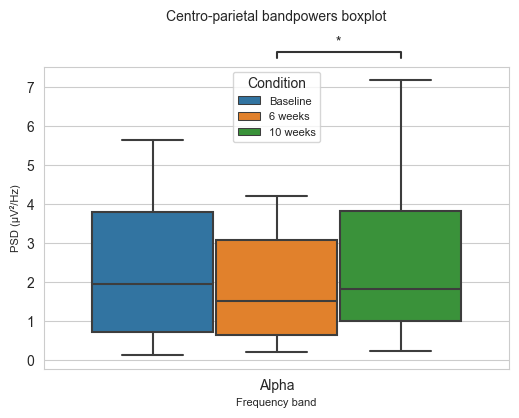

In [21]:
plot_boxplot_location(df_psd_reg,bands=['Alpha'],region='Centro-parietal',
                      condition_comp_list=condition_code_list,
                      condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                      stat_test='t-test_paired',ast_loc='outside',export=True)

Significant changes of Low-Beta are:
Frontal with p-value of 0.04331348561142242
Significant changes of Low-Beta are:
Centro-parietal with p-value of 0.044695174307290315
Occipital with p-value of 0.03162659104134695
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Centro-parietal_EC_06 vs. Centro-parietal_EC_07: t-test paired samples, P_val:4.470e-02 t=-2.114e+00
Occipital_EC_06 vs. Occipital_EC_07: t-test paired samples, P_val:3.163e-02 t=-2.277e+00
Frontal_EC_00 vs. Frontal_EC_06: t-test paired samples, P_val:4.331e-02 t=2.129e+00


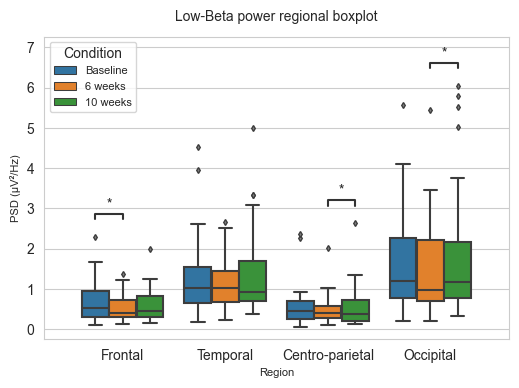

In [18]:
plot_boxplot_band(df_psd_reg,regions=['Frontal','Temporal','Centro-parietal','Occipital'],band='Low-Beta',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  stat_test='t-test_paired',ast_loc='inside',export=True)


Significant changes of Low-Beta are:
FC1 with p-value of 0.007626680747325017
Pz with p-value of 0.03366878147690126
Significant changes of Low-Beta are:
PO3 with p-value of 0.027973247691297658
O2 with p-value of 0.027658520520423037
PO4 with p-value of 0.01933901133968259
P4 with p-value of 0.023346269319346098
CP6 with p-value of 0.014415745942194169
FC6 with p-value of 0.017774057604096727
F4 with p-value of 0.04645647972492318
Significant changes of Low-Beta are:
Fp1 with p-value of 0.04879964909711361
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Fp1_EC_00 vs. Fp1_EC_07: t-test paired samples, P_val:4.880e-02 t=2.071e+00


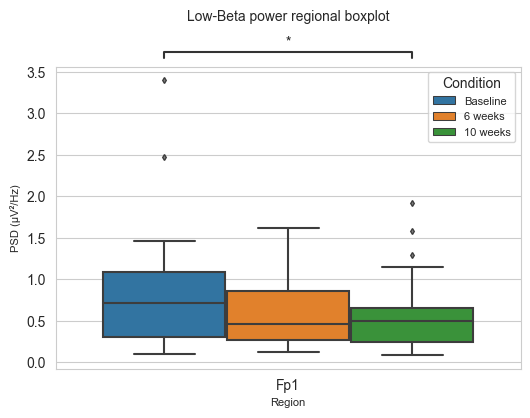

In [10]:
plot_boxplot_band(df_psd_ch,regions=['Fp1'],band='Low-Beta',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  stat_test='t-test_paired',ast_loc='outside',export=True)

In [ ]:
plt.figure()
ax = sns.violinplot(x='Frequency band', y='Frontal',
                 hue='Condition',
                 data=df_psd_reg[df_psd_reg['Frequency band'] == 'Low-Beta'])
ax = sns.swarmplot(x='Frequency band', y='Frontal',
                   hue='Condition', color='0.01', dodge=True,
                   data=df_psd_reg[df_psd_reg['Frequency band'] == 'Low-Beta'])